#STEVEN ARTOS

#COMENTARIOS AL FINAL DEL COLAB

# **LABORATORIO DE REGRESIÓN: PREDICCIÓN DEL NÚMERO DE USUARIOS ACTIVOS EN UNA PLATAFORMA**

En este laboratorio queremos predecir el número de usuarios activos en una plataforma en línea según la hora del día a partir de una serie de mediciones que disponemos en una base de datos. Para esto usaremos métodos de regresión.

https://github.com/rfordatascience/tidytuesday/tree/master/data/

# **Visualización del Dataset**

Importamos las bibliotecas necesarias: pandas para cargar el archivo CSV en un DataFrame de pandas y matplotlib.pyplot para trazar el gráfico.

In [18]:
#importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Cargamos los datos del archivo CSV en un DataFrame de pandas usando la función pd.read_csv(). El archivo CSV debe tener dos columnas llamadas "hour" y "users" para que el código funcione correctamente. El archivo CSV se carga en un DataFrame llamado df

In [19]:
# cargar link de internet con csv
url='https://raw.githubusercontent.com/mtgca/datasets_public/main/active_users_data.csv'
df=pd.read_csv(url)

In [20]:
df.head()

,hour,users
0,22.813344,35
1,21.771161,51
2,12.364208,38
3,3.339412,13
4,22.292544,31


Usamos la función plt.scatter() para crear el gráfico de dispersión. Le pasamos la columna "hour" como eje x y la columna "users" como eje y. El resultado es un gráfico de puntos en el que cada punto representa una combinación de valores de hora y usuarios. Usamos las funciones plt.xlabel() y plt.ylabel() para establecer etiquetas en los ejes x e y del gráfico, respectivamente. Finalmente, usamos la función plt.show() para mostrar el gráfico en la pantalla.

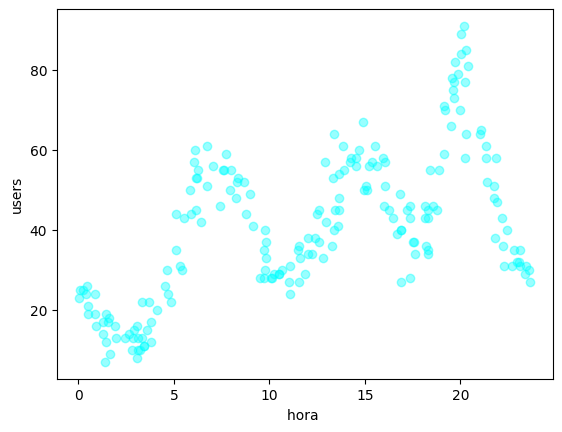

In [21]:
plt.scatter(df['hour'], df['users'],color='aqua',alpha=0.4,label='data ')
plt.xlabel('hora ')
plt.ylabel('users')
plt.show()

#hay mas usuarios conectados en el horario nocturno y madrugada

# **Modelo de regresión lineal**

En este apartado implementaremos regresión lineal sin regularización. Dado que el dataset muestra una relación no lineal (ver visualización arriba), es necesario utilizar regresión polinómica.

Primero, se importan las bibliotecas necesarias, que incluyen:

* PolynomialFeatures: una función para generar características polinómicas para
un conjunto de datos.
* StandardScaler: una función para escalar los datos a un rango común.
* LinearRegression: una función para ajustar un modelo lineal a los datos.
* Pipeline: una función para concatenar varias transformaciones en un estimador.
mean_squared_error: una función para calcular el error cuadrático medio.
* r2_score: una función para calcular el coeficiente de determinación R^2.
* train_test_split: una función para dividir los datos en conjuntos de entrenamiento y prueba.

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

A continuación, se define una función llamada calculate_regression_metrics que toma un modelo, un conjunto de datos x y una variable objetivo ytrue, y devuelve la raíz cuadrada del error cuadrático medio (RMSE) y el coeficiente de determinación R^2. Esta función se utilizará más adelante para calcular las métricas de error para el conjunto de entrenamiento y prueba.

In [23]:
def calculate_regression_metrics(model, x, ytrue):
    ypred = model.predict(x)
    rmse = np.sqrt(mean_squared_error(ytrue, ypred))
    r2 = r2_score(ytrue, ypred)
    return rmse, r2

Luego, los datos se dividen en conjuntos de entrenamiento y prueba utilizando la función train_test_split.

In [24]:
splid_seed=42
train_frac=0.8 #80% DE TEST

train_df, test_df = train_test_split(df, test_size=train_frac, random_state=splid_seed)

A continuación, se ajusta un modelo de regresión polinómica de grado N (ver variable degree) al conjunto de entrenamiento utilizando la función Pipeline.



In [25]:
degree=20
model=Pipeline([ #representar

    ('poly',PolynomialFeatures(degree)),
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
])
model.fit(train_df[['hour']], train_df['users'])

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

Luego, se utilizan la función calculate_regression_metrics y los conjuntos de entrenamiento y prueba para calcular el RMSE y el R^2 para el modelo ajustado en ambos conjuntos.

In [26]:
rmse_train, r2_train = calculate_regression_metrics(model, train_df[['hour']], train_df['users'])
rmse_test, r2_test = calculate_regression_metrics(model, test_df[['hour']], test_df['users'])

In [27]:
print(f"error de entrenamiento: {rmse_train:.2f}")
print(f"coeficiente  det del conjuto de train es  : {r2_train} ")
print(f"error de prueba: {rmse_test:.2f}")
print(f"coeficiente det del conjuto de test: {r2_test}")

error de entrenamiento: 4.94
coeficiente  det del conjuto de train es  : 0.9098335043063619 
error de prueba: 20.70
coeficiente det del conjuto de test: -0.2212492284243568


Finalmente, graficamos el conjunto de entrenamiento y en rojo el modelo entrenado

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


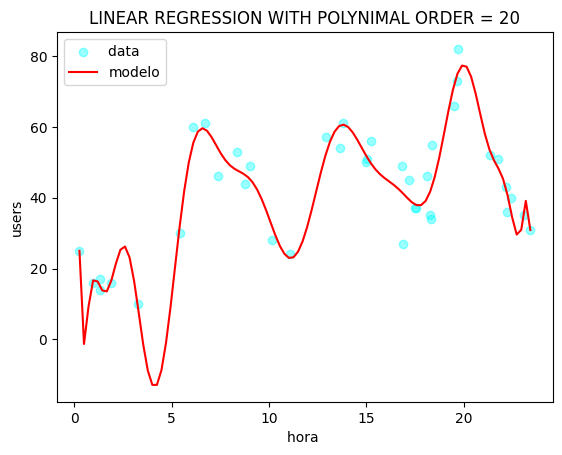

In [28]:
hour_seq=np.linspace(train_df['hour'].min(),train_df['hour'].max(),100).reshape(-1,1)

users_pred=model.predict(hour_seq)

plt.scatter(train_df['hour'],train_df['users'],color='aqua',alpha=0.4,label='data ')
plt.plot(hour_seq,users_pred,color='red',label='modelo')
plt.xlabel('hora ')
plt.ylabel('users')
plt.title("LINEAR REGRESSION WITH POLYNIMAL ORDER = "+str(degree))
plt.legend()
plt.show()

## **Actividad Regresión Lineal:**

Genere un gráfico que muestre cómo cambia el error de entrenamiento y el error de prueba a medida que aumenta el grado de polinomio. En su gráfico, el eje x representará el grado del polinomio que debe ser variado entre 1 y 100. Con respecto al eje y, usted deberá graficar tanto el error en el conjunto de entrenamiento como el error en el conjunto de prueba. Analice el gráfico y determine cuál cree que sería el valor óptimo del grado del polinomio. Para esto, de momento considere que el valor óptimo del grado del polinomio es aquel que **minimiza el error en el conjunto de test **. ** Más adelante veremos que existe una forma más adecuada de escoger el orden del polinomio que no involucra al error en el conjunto de test.** Note que para esta actividad el grado del polinomio está controlando la complejidad del modelo pasando del "underfitting" (modelo simple como el modelo de grado 1) al "overfitting" (modelo de grado alto, es decir de complejidad alta)

In [29]:
train_errors=[]
test_errors=[]
degrees=range(1,101)

In [30]:
for dregree in degrees:
  model=Pipeline([ #representar

    ('poly',PolynomialFeatures(dregree)),
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
])
  model.fit(train_df[['hour']], train_df['users'])
  rmse_train, r2_train = calculate_regression_metrics(model, train_df[['hour']], train_df['users'])
  rmse_test, r2_test = calculate_regression_metrics(model, test_df[['hour']], test_df['users'])

  train_errors.append(rmse_train)
  test_errors.append(rmse_test)

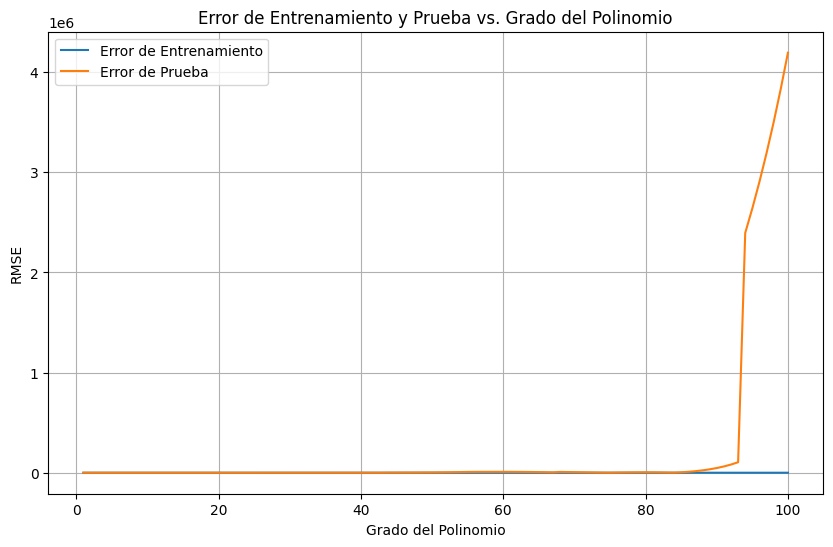

In [31]:
#graficar
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Error de Entrenamiento')
plt.plot(degrees, test_errors, label='Error de Prueba')
plt.xlabel('Grado del Polinomio')
plt.ylabel('RMSE')
plt.title('Error de Entrenamiento y Prueba vs. Grado del Polinomio')
plt.legend()
plt.grid(True)
plt.show()

# **Modelo de Regresión de Ridge**




Ahora, vamos a abordar el problema usando Regresión lineal de Ridge. Recuerde que la regresión de Ridge incluye un hiperparámetro llamado hiperparámetro de regularización que controla el overfitting. El hiperparámetro de regularización varía entre 0 e infinito. Normalmente, lambda tiene valores pequeños como veremos en este laboratorio. Valores grande de lambda pueden causar "underfitting" mientras que valores cercanos a cero pueden causar overfitting.

Primero se importa el modelo de regresión Ridge desde sklearn.linear_model.


In [32]:
from sklearn.linear_model import Ridge

Luego, se establece el valor de regularización lambda_value en 1
Se crea además un modelo de regresión Ridge utilizando un Pipeline de tres pasos:
1. PolynomialFeatures(degree=75) crea características polinómicas de grado 75 a partir de los datos de entrada.
2. StandardScaler() estandariza los datos para que tengan media cero y varianza unitaria.
3. Ridge(alpha=lambda_value) ajusta el modelo de regresión Ridge utilizando el valor de regularización lambda_value. Aunque en clase este hiperparámetro lo definimos con la letra griega lambda, es importante mencionar que en la librería sklearn, este hiperparámetro lo definen con la letra griega alfa.

In [33]:
lambda_value=100000
model_ridge=Pipeline([ #representar

    ('poly',PolynomialFeatures(degree=80)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=lambda_value))
])

Finalmente, el siguiente código ajusta el modelo de Ridge, calcula las métricas correspondientes y presenta el modelo en un gráfico. Note que este código es similar al anteriormente usado por lo que no entraremos en detalle en su funcionamiento. Consulte en la sección anterior para más detalles.

MSE TEST:  18.79386662870038 R SQUARED TEST:  -0.007026364436685029


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


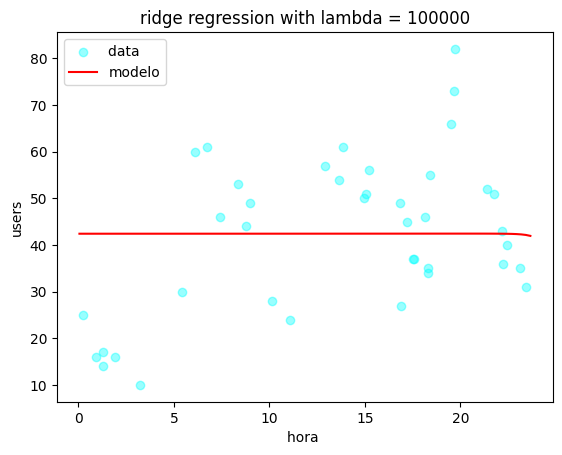

In [34]:
model_ridge.fit(train_df[['hour']], train_df['users'])

rmse_train, r2_train = calculate_regression_metrics(model_ridge, train_df[['hour']], train_df['users'])
rmse_test, r2_test = calculate_regression_metrics(model_ridge, test_df[['hour']], test_df['users'])
print("MSE TEST: ",rmse_test,"R SQUARED TEST: ",r2_test)

pred_test=model_ridge.predict(test_df[['hour']])
hour_seq=np.linspace(test_df['hour'].min(),test_df['hour'].max(),100).reshape(-1,1)

users_pred=model_ridge.predict(hour_seq)

plt.scatter(train_df['hour'],train_df['users'],color='aqua',alpha=0.4,label='data ')
plt.plot(hour_seq,users_pred,color='red',label='modelo')
plt.xlabel('hora ')
plt.ylabel('users')
plt.title("ridge regression with lambda = "+str(lambda_value))
plt.legend()
plt.show()

## **Actividad Regresión de Ridge:**

Observe en el gráfico anterior que para lambda = 1, el modelo de Ridge está en underfitting (el modelo es demasiado simple respecto de los datos de entrada). Esto nos hace pensar que lambda debe ser más pequeño. Como, en general, lambda suele tomar valores pequeños, varie lambda en el siguiente conjunto de valores: **[1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1,10,100]**. Para cada valor de lambda, obtenga el RMSE y luego grafique el RMSE (eje y) vs el valor de lambda (eje x). Note que para visualizar correctamente este gráfico, es necesario que la escala del eje x sea logarítmica. Para esto, usted debe añadir `plt.xscale('log')` en su código al momento de graficar. Observe el siguiente ejemplo de gráfica con escala logarítmica en el eje x. Finalmente, analice el gráfico y determine cuál cree que sería el valor óptimo de lambda. Para esto, de momento considere que el valor óptimo de lambda es aquel que minimiza el error en el conjunto de test. Más adelante veremos que existe una forma más adecuada de escoger lambda que no involucra al error en el conjunto de test. Note que para esta actividad lambda está controlando la complejidad del modelo

In [35]:
def calculate_ridge_regression_metrics(alpha,x_train,y_train,x_test,y_test):
  model=Pipeline([ #representar

    ('poly',PolynomialFeatures(degree=80)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=alpha))
])
  model.fit(x_train, y_train)

  rmse_train,_ = calculate_regression_metrics(model,x_train,y_train)
  rmse_test,_ = calculate_regression_metrics(model,x_test,y_test)
  return rmse_train, rmse_test

In [36]:
alphas=[1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100]
train_errors=[]
test_errors=[]

for alpha in alphas:
  rmse_train, rmse_test=calculate_ridge_regression_metrics(alpha,train_df[['hour']],train_df['users'],test_df[['hour']],test_df['users'])
  train_errors.append(rmse_train)
  test_errors.append(rmse_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=1.52516e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:252: LinAlgWarning: Ill-conditioned matrix (rcond=5.44006e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


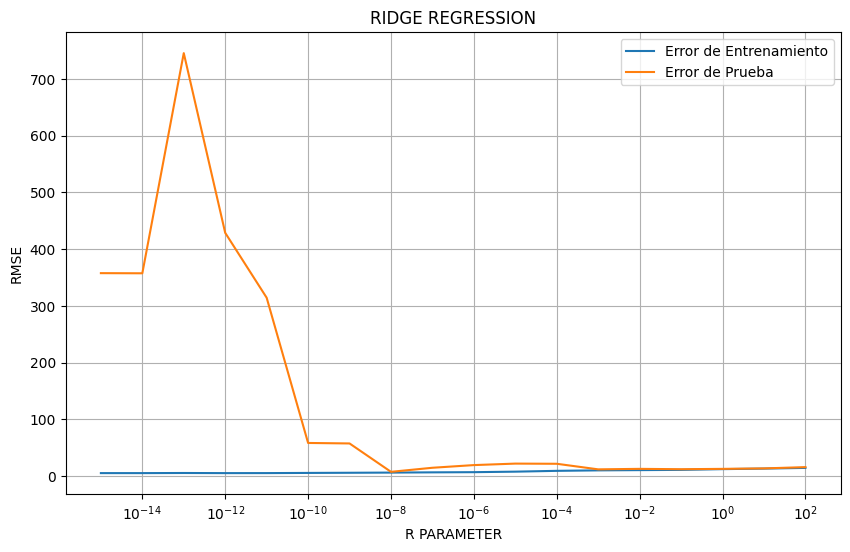

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label='Error de Entrenamiento')
plt.plot(alphas, test_errors, label='Error de Prueba')
plt.xlabel('R PARAMETER')
plt.ylabel('RMSE')
plt.title('RIDGE REGRESSION')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.show()


#COMENTARIOS FINALES REGRESIÓN POLINÓMICA

#Este laboratorio tuvo como objetivo predecir el número de usuarios activos en una plataforma en línea según la hora del día utilizando diferentes técnicas de regresión.

#Ayuda a entender cómo modelar relaciones no lineales mediante regresión polinómica y cómo usar la regularización (Ridge) para mejorar la generalización del modelo.

#La regresión polinómica es un tipo de regresión que permite modelar relaciones no lineales entre una variable independiente

#En la regresión polinómica, al aumentar el grado del polinomio, el modelo puede volverse demasiado complejo y ajustarse demasiado bien a los datos de entrenamiento, capturando ruido en lugar de la verdadera tendencia. Esto genera un problema de sobreajuste (overfitting), donde el modelo tiene un bajo error en el entrenamiento pero un alto error en el conjunto de prueba.

#Para solucioonar, usamos regresión de Ridge, que es una forma de regresión